## Exercise 13

# a)
We take r subsets with replacement of the data length n, and calculate the emperical mean r times. 
Then, for each subset, we subtract the mean of all the means from the mean of each subset, and count how many of theese numbers are within the interval [a,b]



## b)

In [17]:
import numpy as np
x = np.array([56, 101, 78, 67, 93, 87, 64, 72, 80, 69])

r = 100000

X = [np.random.choice(x, len(x)) for _ in range(r)]
X = np.stack(X)
emp_mean = X.mean(axis=1)
mean = emp_mean.mean()
p = emp_mean - mean
p = np.count_nonzero(abs(p) < 5) / r

In [18]:
p

0.76581

# Exercise 15

In [36]:
n, r = 15, 10000
x = [5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8]
X = [np.random.choice(x, n) for _ in range(r)]
X = np.stack(X)
s2 = X.var(axis=1)

len(s2)

s2.var()

51.433067181649385

# Exercise 8.3

<AxesSubplot:>

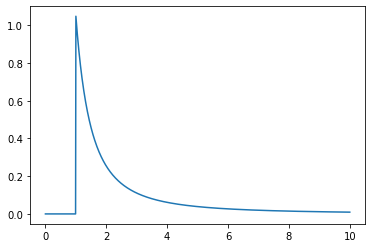

In [56]:
from scipy.stats import pareto as sci_pareto
import seaborn as sns
import pandas as pd

def pareto(beta, k):
    return sci_pareto(b=k, scale=beta)

def bootstrap(data, stat_func=lambda x: np.median, size = 1000):
    X = [np.random.choice(data, len(data)) for _ in range(size)]
    stat = stat_func(X, axis=1)
    return stat.var()

x = np.linspace(0,10,1000)
sns.lineplot(x=x, y=pareto(1, 1.05).pdf(x))

In [57]:
sample = pareto(1, 1.05).rvs(size=200)

In [58]:
mean, median = sample.mean(), np.median(sample)
var_mean = bootstrap(sample, np.mean)
var_median = bootstrap(sample, np.median)

In [61]:
df = pd.DataFrame({'stat': [mean, median], 'var':[var_mean, var_median]}, index=['mean', 'median'])

In [62]:
df

,stat,var
mean,4.141244,0.229267
median,1.749461,0.013682


The Precision of the median is much better